# Hotel Recommendation System :-

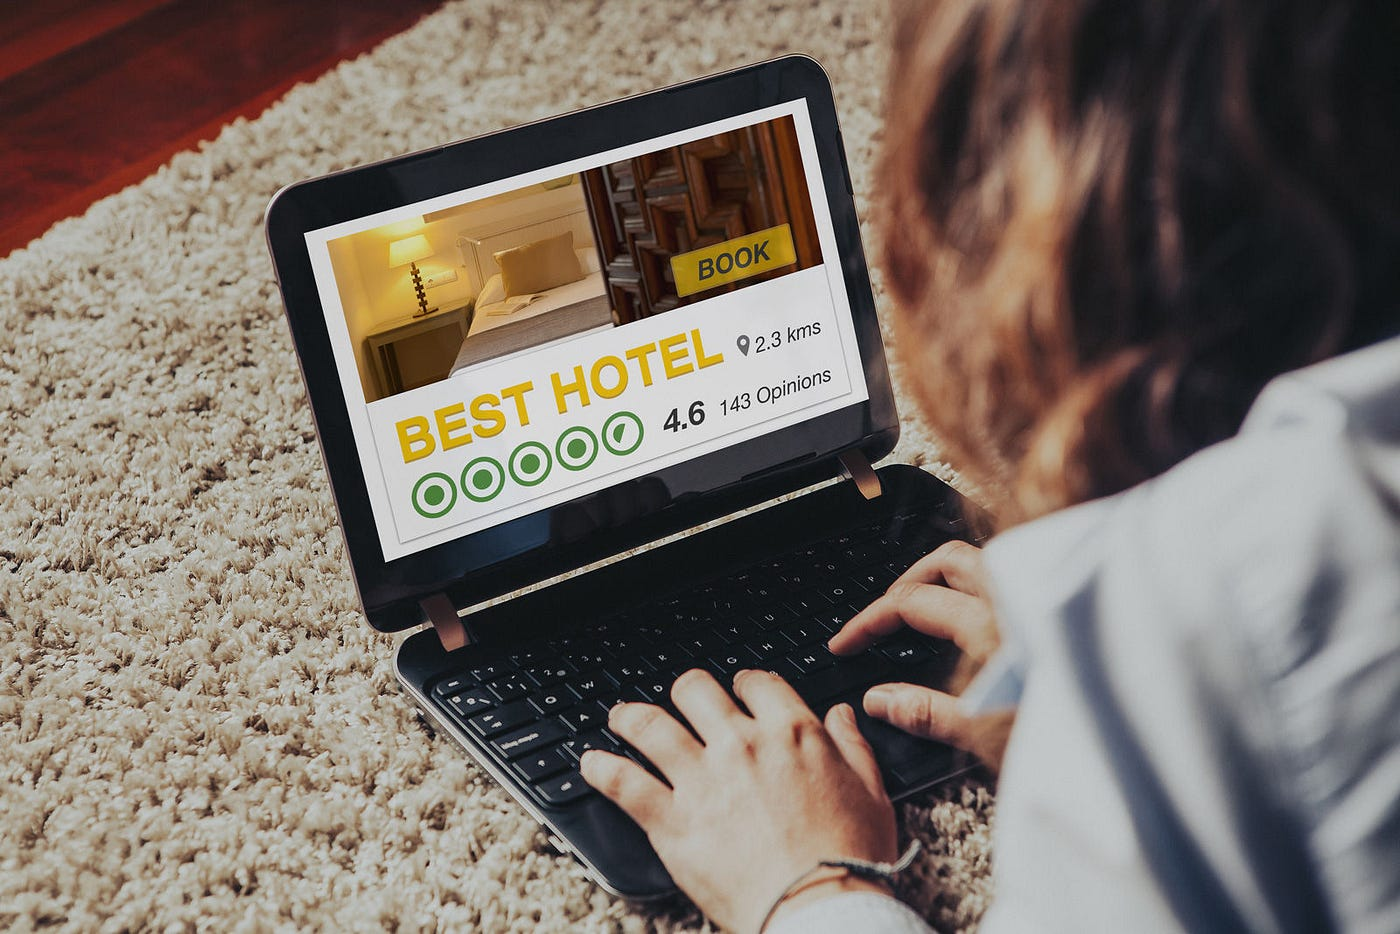

In [1]:
from IPython import display
display.Image("C:\\Users\\Rohan\\Desktop\\Hotel recomendation.jpg")

In [2]:
!pip install optimal-data-selector

Defaulting to user installation because normal site-packages is not writeable


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels
import optimal_data_selector
import os
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
hotel_detail=0
hotel_rooms_attribute=0
hotel_room_price=0
folder="E:\\Hotel\\"

In [5]:
data_sets=[]
for j in os.listdir("E:\Hotel"):
    a=folder+j
    data_sets.append(pd.read_csv(folder+j))
hotel_room_price=data_sets[0]
hotel_detail=data_sets[1]
hotel_rooms_attribute=data_sets[2]

In [6]:
hotel_detail

,id,hotelid,hotelname,address,city,country,zipcode,propertytype,starrating,latitude,longitude,Source,url,curr
0,46406,1771651,Mediteran Bungalow Galeb,Vukovarska 7,Omis,Croatia,21310.0,Holiday parks,4,43.440124,16.682505,2,https://www.booking.com/hotel/hr/bungalow-luxu...,EUR
1,46407,177167,Hotel Polonia,Plac Teatralny 5,Torun,Poland,NaN,Hotels,3,53.012329,18.603800,5,https://www.agoda.com/en-gb/hotel-polonia/hote...,EUR
2,46408,1771675,Rifugio Sass Bece,"Belvedere del Pordoi,1",Canazei,Italy,38032.0,Hotels,3,46.477920,11.813350,2,http://www.booking.com/hotel/it/rifugio-sass-b...,EUR
3,46409,177168,Madalena Hotel,Mykonos,Mykonos,Greece,84600.0,Hotels,3,37.452316,25.329849,5,https://www.agoda.com/en-gb/madalena-hotel/hot...,EUR
4,46410,1771718,Pension Morenfeld,Mair im Korn Strasse 2,Lagundo,Italy,39022.0,Hotels,3,46.682780,11.131736,2,http://www.booking.com/hotel/it/pension-morenf...,EUR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108043,154449,1771620,Hotel Stadt Tuttlingen,Donaustrasse 30,Tuttlingen,Germany,78532.0,Hotels,3,47.985364,8.817228,2,http://www.booking.com/hotel/de/stadt-tuttling...,EUR
108044,154450,1771626,Hotel Beroe,15 Yasen Str.,Sveti Vlas,Bulgaria,8256.0,Hotels,3,42.710919,27.763325,2,http://www.booking.com/hotel/bg/beroe.en-gb.html,BGN
108045,154451,177163,Hotel Rothmans,14 Ohrid Str.,Bansko,Bulgaria,2770.0,Hotels,3,41.837379,23.492391,2,http://www.booking.com/hotel/bg/rothmans-bansk...,BGN
108046,154452,177164,Boutique Suites Rainbow 4,Cacao Beach,Sunny Beach,Bulgaria,8240.0,Hotels,3,42.674317,27.704325,2,https://www.booking.com/hotel/bg/rainbow-4-bou...,BGN


In [7]:
hotel_detail_new=hotel_detail.copy()

In [8]:
hotel_rooms_attribute

,id,hotelcode,roomamenities,roomtype,ratedescription
0,50677497,634876,Air conditioning: ;Alarm clock: ;Carpeting: ;C...,Double Room,"Room size: 15 m²/161 ft², Shower, 1 king bed"
1,50672149,8328096,Air conditioning: ;Closet: ;Fireplace: ;Free W...,Vacation Home,"Shower, Kitchenette, 2 bedrooms, 1 double bed ..."
2,50643430,8323442,Air conditioning: ;Closet: ;Dishwasher: ;Firep...,Vacation Home,"Shower, Kitchenette, 2 bedrooms, 1 double bed ..."
3,50650317,7975,Air conditioning: ;Clothes rack: ;Coffee/tea m...,Standard Triple Room,"Room size: 20 m²/215 ft², Shower, 3 single beds"
4,50650318,7975,Air conditioning: ;Clothes rack: ;Coffee/tea m...,Standard Triple Room,"Room size: 20 m²/215 ft², Shower, 3 single beds"
...,...,...,...,...,...
165868,88527729,268416,Air conditioning: ;Alarm clock: ;Carpeting: ;C...,Twin Room,"Room size: 17 m²/183 ft², Non-smoking, Shower,..."
165869,88527730,268416,Air conditioning: ;Alarm clock: ;Carpeting: ;C...,Twin Room,"Room size: 17 m²/183 ft², Non-smoking, Shower,..."
165870,88527731,268416,Air conditioning: ;Alarm clock: ;Carpeting: ;C...,Twin Room,"Room size: 17 m²/183 ft², Non-smoking, Shower,..."
165871,88527215,268416,Air conditioning: ;Free Wi-Fi in all rooms!: ;...,Twin Standard,"Pay nothing until November 21, 2019, Free Wi-F..."


In [9]:
hotel_room_price

,id,refid,hotelcode,websitecode,dtcollected,ratedate,los,guests,roomtype,onsiterate,...,promoname,status_code,taxstatus,taxtype,taxamount,proxyused,israteperstay,mealinclusiontype,hotelblock,input_dtcollected
0,50677497,8646773,634876,5,2019-10-12 15:46:54,2019-11-02,1,1,Double Room,82.36,...,NaN,200,2,NaN,0.0,media:M3diAproxy@173.44.165.126:80,Y,Free Breakfast,NaN,2019-10-13
1,50672149,6234691,8328096,5,2019-10-12 15:47:45,2019-11-30,1,1,Vacation Home,636.09,...,NaN,200,2,NaN,0.0,media:M3diAproxy@173.44.164.126:80,Y,NaN,NaN,2019-10-13
2,50643430,7015677,8323442,5,2019-10-12 15:47:00,2019-12-20,1,1,Vacation Home,591.74,...,NaN,200,2,NaN,0.0,media:M3diAproxy@173.44.166.122:80,Y,NaN,NaN,2019-10-13
3,50650317,7327094,7975,5,2019-10-12 15:47:02,2019-12-28,1,1,Standard Triple Room,881.48,...,NaN,200,2,Tax 20%,0.0,media:M3diAproxy@209.242.219.141:80,Y,NaN,NaN,2019-10-13
4,50650318,7327094,7975,5,2019-10-12 15:47:02,2019-12-28,1,1,Standard Triple Room,897.53,...,NaN,200,2,VAT $ 179.51,0.0,media:M3diAproxy@209.242.219.141:80,Y,Free breakfast for {3},NaN,2019-10-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165868,88527729,9572875,268416,5,2019-10-13 01:03:10,2019-11-26,1,1,Twin Room,81.83,...,NaN,200,2,VAT $ 16.37,0.0,media:M3diAproxy@173.44.166.122:80,Y,NaN,NaN,2019-10-13
165869,88527730,9572875,268416,5,2019-10-13 01:03:10,2019-11-26,1,1,Twin Room,89.80,...,NaN,200,2,VAT $ 17.97,0.0,media:M3diAproxy@173.44.166.122:80,Y,Free breakfast for {2},NaN,2019-10-13
165870,88527731,9572875,268416,5,2019-10-13 01:03:10,2019-11-26,1,1,Twin Room,99.78,...,NaN,200,2,VAT $ 19.96,0.0,media:M3diAproxy@173.44.166.122:80,Y,Free breakfast for {2},NaN,2019-10-13
165871,88527215,9572875,268416,5,2019-10-13 01:03:11,2019-11-26,1,1,Twin Standard,70.13,...,NaN,200,2,Tax 20%,0.0,media:M3diAproxy@173.44.166.122:80,Y,NaN,NaN,2019-10-13


In [10]:
all_df={'hotel_detail':hotel_detail,'hotel_rooms_attribute':hotel_rooms_attribute,'hotel_room_price':hotel_room_price}
for c,d in all_df.items():
    print('df : ',c,' shape : '+str(d.shape))

df :  hotel_detail  shape : (108048, 14)
df :  hotel_rooms_attribute  shape : (165873, 5)
df :  hotel_room_price  shape : (165873, 30)


In [11]:
hotel_price_id=[]
hotel_detail_id=[]
hotel_price_id_ind=[]
for i in hotel_room_price['hotelcode'].values:
    hotel_price_id.append(i)
for i2 in hotel_detail['hotelid'].values:
    if i2 in hotel_price_id:
        hotel_detail_id.append(i2)
        hotel_price_id_ind.append(hotel_room_price.loc[hotel_room_price['hotelcode']==i2].index)

In [12]:
hotel_detail2=hotel_detail.copy()

In [13]:
df_ratings=0
ratings=[]
for r in hotel_detail['hotelid'].values:
    if r in hotel_detail_id:
        df_ratings=hotel_detail.loc[hotel_detail['hotelid']==r,['hotelid','starrating']]
        ratings.append(df_ratings['starrating'].mean())
        df_ratings=0   

In [14]:
h_d2=pd.DataFrame({'hotelname':hotel_detail2['hotelname'],'hotelname1':hotel_detail2['hotelname']})
h_d3=pd.DataFrame({'hotelid':hotel_detail2['hotelid'],'hotelid1':hotel_detail2['hotelid']})
h_d2.drop_duplicates(inplace=True)
h_d3.drop_duplicates(inplace=True)

In [15]:
id1=[]
name=[]
adress=[]
city=[]
country=[]
df_hoteldetail=0
for i in hotel_detail['hotelid'].values:
    if i in hotel_detail_id:
        df_hoteldetail=hotel_detail.loc[hotel_detail['hotelid']==i,['hotelid','hotelname','address','city','country']]
        for d in df_hoteldetail['hotelid'].values:
            id1.append(d)
        for d1 in df_hoteldetail['hotelname'].values:
            name.append(d1)
        for d2 in df_hoteldetail['address'].values:
            adress.append(d2)
        for d3 in df_hoteldetail['city'].values:
            city.append(d3)
        for d4 in df_hoteldetail['country'].values:
            country.append(d4)
            df_hoteldetail=0
df1=pd.DataFrame({'hotelid':id1,'hotelname':name,'adress':adress,'city':city,'country':country})
df1.drop_duplicates(inplace=True)    
df1['ratings']=ratings
df1

,hotelid,hotelname,adress,city,country,ratings
0,177234,Elounda Ilion Hotel,Main Street,Crete Island,Greece,4.0
1,177240,Maistrali Hotel,Tragaki Beach,Zakynthos Island,Greece,2.0
2,177242,Margarita Hotel,Main Street,Santorini,Greece,2.0
3,177255,Sellada Beach Hotel,Perissa,Santorini,Greece,4.0
4,177408,Hotel Krone,Rainerstrasse 1,Mondsee,Austria,3.5
...,...,...,...,...,...,...
10801,177028,Soar Mill Cove Hotel,Soar Mill Cove,Malborough,United Kingdom,4.0
10804,177042,Jackson's Hotel,"Main Street, Ballybofey, Co Donegal",Ballybofey,Ireland,4.0
10805,177127,Chateau d'Ayres - Hotel & Spa,Les Ayres,Meyrueis,France,4.0
10806,177162,Hotel Rainbow 3 - Resort Club,"Sunny Beach, Cacao Beach",Sunny Beach,Bulgaria,3.0


In [16]:
df_hotel_rooms_attribute=0
code=[]
rate_des=[]
rate_des1=[]
for h in hotel_rooms_attribute['hotelcode'].values:
    if h in hotel_detail_id:
        df_hotel_rooms_attribute=hotel_rooms_attribute.loc[hotel_rooms_attribute['hotelcode']==h,['hotelcode','roomamenities','ratedescription']]
        for c in df_hotel_rooms_attribute['hotelcode'].values:
            code.append(c)
        for r in df_hotel_rooms_attribute['roomamenities'].values:
            rate_des.append(r)
        for r1 in df_hotel_rooms_attribute['ratedescription'].values:
            rate_des1.append(r1)
            df_hotel_rooms_attribute=0
df2=pd.DataFrame({'hotelcode':code,'roomamenities':rate_des,'ratedescription':rate_des1})     
df2.drop_duplicates(inplace=True)
df2

,hotelcode,roomamenities,ratedescription
0,634876,Air conditioning: ;Alarm clock: ;Carpeting: ;C...,"Room size: 15 m²/161 ft², Shower, 1 king bed"
2,634876,Air conditioning: ;Alarm clock: ;Carpeting: ;C...,"Room size: 17 m²/183 ft², Shower, 1 queen bed ..."
3,634876,Air conditioning: ;Alarm clock: ;Carpeting: ;C...,"Room size: 17 m²/183 ft², Shower, 1 double bed"
4,634876,Air conditioning: ;Alarm clock: ;Carpeting: ;C...,"Room size: 13 m²/140 ft², Shower, 1 queen bed ..."
10,8328096,Air conditioning: ;Closet: ;Fireplace: ;Free W...,"Shower, Kitchenette, 2 bedrooms, 1 double bed ..."
...,...,...,...
9030668,42508,Air conditioning: ;Bathrobes: ;Closet: ;Desk: ...,"Room size: 37 m²/398 ft², Shower and bathtub, ..."
9030996,6592926,Air conditioning: ;Dressing room: ;Free Wi-Fi ...,"Room size: 16 m²/172 ft², 2 single beds"
9030999,6592926,Air conditioning: ;Free Wi-Fi in all rooms!: ;...,"Room size: 20 m²/215 ft², Balcony/terrace, 1 d..."
9031001,6592926,Air conditioning: ;Free Wi-Fi in all rooms!: ;...,"Room size: 20 m²/215 ft², 2 single beds"


In [17]:
ddf=df1.copy()

In [18]:
ind1=[]
ind2=[]
dff1=pd.DataFrame({'hotelid':df1['hotelid']})
dff1['hotelid1']=df1['hotelid']
dff1.drop_duplicates(inplace=True)
dff1
for i2 in dff1.index:
    ind1.append(i2)
for i in df1.index:
    if i not in ind1:
        ind2.append(i)
df1.drop(index=ind2,axis=0,inplace=True)
df1

,hotelid,hotelname,adress,city,country,ratings
0,177234,Elounda Ilion Hotel,Main Street,Crete Island,Greece,4.0
1,177240,Maistrali Hotel,Tragaki Beach,Zakynthos Island,Greece,2.0
2,177242,Margarita Hotel,Main Street,Santorini,Greece,2.0
3,177255,Sellada Beach Hotel,Perissa,Santorini,Greece,4.0
4,177408,Hotel Krone,Rainerstrasse 1,Mondsee,Austria,3.5
...,...,...,...,...,...,...
10799,176972,Panorama Studios and Suites,KATO FIRA Agiou Mina FIRA SANTORINI,Santorini,Greece,3.0
10800,177028,"Marina Hotel - All Inclusive, Sunny Day Co.",Sunny Day Resort,St. St. Constantine and Helena,Bulgaria,4.0
10804,177042,Jackson's Hotel,"Main Street, Ballybofey, Co Donegal",Ballybofey,Ireland,4.0
10805,177127,Chateau d'Ayres - Hotel & Spa,Les Ayres,Meyrueis,France,4.0


In [19]:
d={}
key=[]
values=[]
at_name=[]
for k in df1['hotelid'].values:
    key.append(k)
for v in df1['hotelname'].values:
    values.append(v)
for keys,value in zip(key,values):
    d[keys]=value
for i in df2['hotelcode'].values:
    if i in d:
        at_name.append(d[i])
df2.insert(1,'hotelname',at_name)
df2.shape

(41379, 4)

In [20]:
d2={}
d3={}
d4={}
d5={}
ratings2=[]
address2=[]
city2=[]
country2=[]
for ii,r in df1.iterrows():
    key1=r['hotelname']
    values1=r['ratings']
    values2=r['adress']
    values3=r['city']
    values4=r['country']
    d2[key1]=values1
    d3[key1]=values2
    d4[key1]=values3
    d5[key1]=values4
for df in df2['hotelname'].values:
    ratings2.append(d2[df])
    address2.append(d3[df])
    city2.append(d4[df])
    country2.append(d5[df])
df2['ratings']=ratings2
data_d={'address':address2,'city':city2,'country':country2}
for i,(p,o) in enumerate(data_d.items(),start=2):
    df2.insert(i,p,o)
print('columns are : ',df2.columns)
df2.shape

columns are :  Index(['hotelcode', 'hotelname', 'address', 'city', 'country', 'roomamenities',
       'ratedescription', 'ratings'],
      dtype='object')


(41379, 8)

In [21]:
tem_df=0
onsiterate=[]
ho_code=[]
ind4=[]
d8={}
rate=[]
for p in hotel_room_price['hotelcode'].values:
    if p in ind1:
        tem_df=hotel_room_price.loc[hotel_room_price['hotelcode']==p,['hotelcode','onsiterate']]
        for t in tem_df['onsiterate'].values:
            onsiterate.append(t)
        for t1 in tem_df['hotelcode'].values:
            ho_code.append(t1)
            tem_df=0
dff3=pd.DataFrame({'hotelcode':ho_code,'onsiterate':onsiterate})
dff4=pd.DataFrame({'hotelcode':dff3['hotelcode']})
dff4['hotelcode1']=dff3['hotelcode']
dff4.drop_duplicates(inplace=True)
for i in dff3.index:
    if i not in list(dff4.index):
        ind4.append(i)
dff3.drop(index=ind4,axis=0,inplace=True)
for df4,r1 in dff3.iterrows():
    k1=r1['hotelcode']
    v1=r1['onsiterate']
    d8[k1]=v1
try:
    for dd in df2['hotelcode'].values:
        if dd in d8:
            rate.append(d8[dd])
        else:
            rate.append('Not available')
except:
    df2['onsiterate']=np.nan
else:
    df2['onsiterate']=rate
df2.index =range(0,df2.shape[0])
df2

,hotelcode,hotelname,address,city,country,roomamenities,ratedescription,ratings,onsiterate
0,634876,The Old Cider House,25 Castle Street,Nether Stowey,United Kingdom,Air conditioning: ;Alarm clock: ;Carpeting: ;C...,"Room size: 15 m²/161 ft², Shower, 1 king bed",4.0,Not available
1,634876,The Old Cider House,25 Castle Street,Nether Stowey,United Kingdom,Air conditioning: ;Alarm clock: ;Carpeting: ;C...,"Room size: 17 m²/183 ft², Shower, 1 queen bed ...",4.0,Not available
2,634876,The Old Cider House,25 Castle Street,Nether Stowey,United Kingdom,Air conditioning: ;Alarm clock: ;Carpeting: ;C...,"Room size: 17 m²/183 ft², Shower, 1 double bed",4.0,Not available
3,634876,The Old Cider House,25 Castle Street,Nether Stowey,United Kingdom,Air conditioning: ;Alarm clock: ;Carpeting: ;C...,"Room size: 13 m²/140 ft², Shower, 1 queen bed ...",4.0,Not available
4,8328096,Pantlleni,NaN,Beddgelert,United Kingdom,Air conditioning: ;Closet: ;Fireplace: ;Free W...,"Shower, Kitchenette, 2 bedrooms, 1 double bed ...",3.0,Not available
...,...,...,...,...,...,...,...,...,...
41374,42508,Abode Glasgow,129 Bath St,Glasgow,United Kingdom,Air conditioning: ;Bathrobes: ;Closet: ;Desk: ...,"Room size: 37 m²/398 ft², Shower and bathtub, ...",4.0,Not available
41375,6592926,Kyriad Bordeaux Ouest - Merignac Aeroport,3 Rue Euler,Merignac,France,Air conditioning: ;Dressing room: ;Free Wi-Fi ...,"Room size: 16 m²/172 ft², 2 single beds",3.0,Not available
41376,6592926,Kyriad Bordeaux Ouest - Merignac Aeroport,3 Rue Euler,Merignac,France,Air conditioning: ;Free Wi-Fi in all rooms!: ;...,"Room size: 20 m²/215 ft², Balcony/terrace, 1 d...",3.0,Not available
41377,6592926,Kyriad Bordeaux Ouest - Merignac Aeroport,3 Rue Euler,Merignac,France,Air conditioning: ;Free Wi-Fi in all rooms!: ;...,"Room size: 20 m²/215 ft², 2 single beds",3.0,Not available


In [22]:
dfff2=df2.copy()

In [23]:
df2.duplicated().sum()

0

In [24]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41379 entries, 0 to 41378
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   hotelcode        41379 non-null  int64  
 1   hotelname        41379 non-null  object 
 2   address          40944 non-null  object 
 3   city             41379 non-null  object 
 4   country          41379 non-null  object 
 5   roomamenities    39513 non-null  object 
 6   ratedescription  39513 non-null  object 
 7   ratings          41379 non-null  float64
 8   onsiterate       41379 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 2.8+ MB


In [25]:
df2.isnull().sum()

hotelcode             0
hotelname             0
address             435
city                  0
country               0
roomamenities      1866
ratedescription    1866
ratings               0
onsiterate            0
dtype: int64

In [26]:
df2.dropna(axis=0,inplace=True)
df2.index=range(0,df2.shape[0])
df2

,hotelcode,hotelname,address,city,country,roomamenities,ratedescription,ratings,onsiterate
0,634876,The Old Cider House,25 Castle Street,Nether Stowey,United Kingdom,Air conditioning: ;Alarm clock: ;Carpeting: ;C...,"Room size: 15 m²/161 ft², Shower, 1 king bed",4.0,Not available
1,634876,The Old Cider House,25 Castle Street,Nether Stowey,United Kingdom,Air conditioning: ;Alarm clock: ;Carpeting: ;C...,"Room size: 17 m²/183 ft², Shower, 1 queen bed ...",4.0,Not available
2,634876,The Old Cider House,25 Castle Street,Nether Stowey,United Kingdom,Air conditioning: ;Alarm clock: ;Carpeting: ;C...,"Room size: 17 m²/183 ft², Shower, 1 double bed",4.0,Not available
3,634876,The Old Cider House,25 Castle Street,Nether Stowey,United Kingdom,Air conditioning: ;Alarm clock: ;Carpeting: ;C...,"Room size: 13 m²/140 ft², Shower, 1 queen bed ...",4.0,Not available
4,7975,Apollo Hotel London,64-66 Queensborough Terrace,London,United Kingdom,Air conditioning: ;Clothes rack: ;Coffee/tea m...,"Room size: 20 m²/215 ft², Shower, 3 single beds",2.0,881.48
...,...,...,...,...,...,...,...,...,...
39073,42508,Abode Glasgow,129 Bath St,Glasgow,United Kingdom,Air conditioning: ;Bathrobes: ;Closet: ;Coffee...,"Room size: 32 m²/344 ft², Shower and bathtub, ...",4.0,Not available
39074,42508,Abode Glasgow,129 Bath St,Glasgow,United Kingdom,Air conditioning: ;Bathrobes: ;Closet: ;Desk: ...,"Room size: 37 m²/398 ft², Shower and bathtub, ...",4.0,Not available
39075,6592926,Kyriad Bordeaux Ouest - Merignac Aeroport,3 Rue Euler,Merignac,France,Air conditioning: ;Dressing room: ;Free Wi-Fi ...,"Room size: 16 m²/172 ft², 2 single beds",3.0,Not available
39076,6592926,Kyriad Bordeaux Ouest - Merignac Aeroport,3 Rue Euler,Merignac,France,Air conditioning: ;Free Wi-Fi in all rooms!: ;...,"Room size: 20 m²/215 ft², Balcony/terrace, 1 d...",3.0,Not available


<Figure size 1000x600 with 0 Axes>

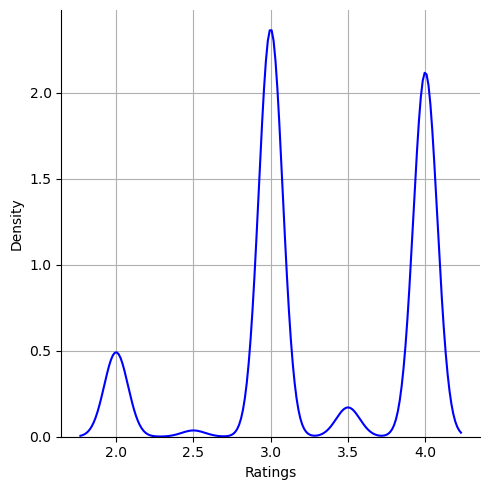

In [27]:
plt.figure(figsize=(10,6))
sns.displot(df2['ratings'],kind='kde',color='blue')
plt.xlabel('Ratings')
plt.ylabel('Density')
plt.grid()
plt.show()

## Onsiterate :

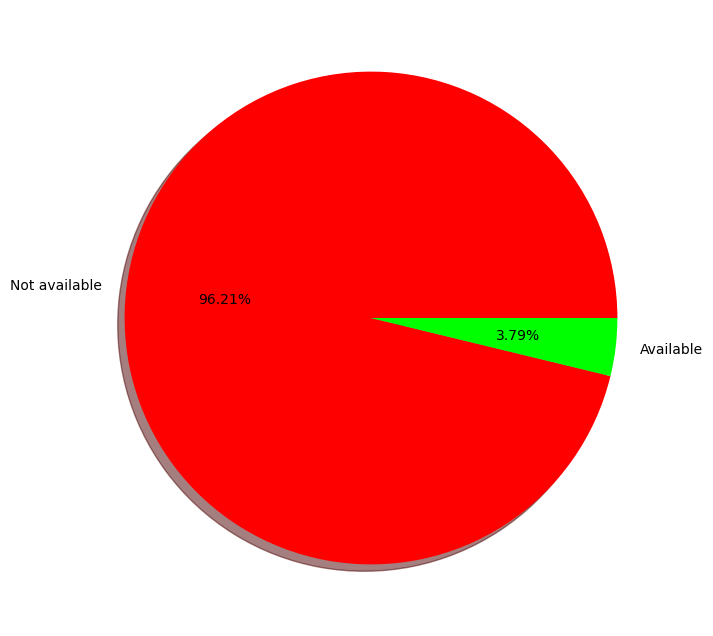

In [28]:
siterate=[]
count_rate=[]
for i in df2['onsiterate'].values:
    if i != 'Not available':
        siterate.append(1)
    else:
        siterate.append(0)
for i2 in range(0,2):
    count_rate.append(siterate.count(i2))
plt.figure(figsize=(10,8))
plt.pie(count_rate, autopct='%.2f%%', labels=['Not available','Available'], colors=['red', 'lime'],shadow=True)
plt.show()

In [29]:
df2['ratings'].describe()

count    39078.000000
mean         3.326693
std          0.637498
min          2.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          4.000000
Name: ratings, dtype: float64

In [30]:
from optimal_data_selector.text import Punctuations,word_tokenizer
from optimal_data_selector.word import short_word_treatment

## Removing Puntuations :

In [31]:
p1='/'
if p1 in Punctuations:
    Punctuations.remove('/')
def re_punc(text):
    toc=word_tokenizer(text,del_words=Punctuations)
    for i in toc:
        ss=' '.join([sd for sd in toc])
    return ss
for c in df2[['roomamenities','ratedescription']]:
    df2[c]=df2[c].apply(lambda text:re_punc(text))
df2

,hotelcode,hotelname,address,city,country,roomamenities,ratedescription,ratings,onsiterate
0,634876,The Old Cider House,25 Castle Street,Nether Stowey,United Kingdom,Air conditioning Alarm clock Carpeting Closet ...,Room size 15 m² / 161 ft² Shower 1 king bed,4.0,Not available
1,634876,The Old Cider House,25 Castle Street,Nether Stowey,United Kingdom,Air conditioning Alarm clock Carpeting Closet ...,Room size 17 m² / 183 ft² Shower 1 queen bed o...,4.0,Not available
2,634876,The Old Cider House,25 Castle Street,Nether Stowey,United Kingdom,Air conditioning Alarm clock Carpeting Closet ...,Room size 17 m² / 183 ft² Shower 1 double bed,4.0,Not available
3,634876,The Old Cider House,25 Castle Street,Nether Stowey,United Kingdom,Air conditioning Alarm clock Carpeting Closet ...,Room size 13 m² / 140 ft² Shower 1 queen bed o...,4.0,Not available
4,7975,Apollo Hotel London,64-66 Queensborough Terrace,London,United Kingdom,Air conditioning Clothes rack Coffee / tea mak...,Room size 20 m² / 215 ft² Shower 3 single beds,2.0,881.48
...,...,...,...,...,...,...,...,...,...
39073,42508,Abode Glasgow,129 Bath St,Glasgow,United Kingdom,Air conditioning Bathrobes Closet Coffee / tea...,Room size 32 m² / 344 ft² Shower and bathtub 1...,4.0,Not available
39074,42508,Abode Glasgow,129 Bath St,Glasgow,United Kingdom,Air conditioning Bathrobes Closet Desk DVD / C...,Room size 37 m² / 398 ft² Shower and bathtub 1...,4.0,Not available
39075,6592926,Kyriad Bordeaux Ouest - Merignac Aeroport,3 Rue Euler,Merignac,France,Air conditioning Dressing room Free Wi Fi in a...,Room size 16 m² / 172 ft² 2 single beds,3.0,Not available
39076,6592926,Kyriad Bordeaux Ouest - Merignac Aeroport,3 Rue Euler,Merignac,France,Air conditioning Free Wi Fi in all rooms In ro...,Room size 20 m² / 215 ft² Balcony / terrace 1 ...,3.0,Not available


## Dealing with short words :

In [32]:
for c2 in df2[['roomamenities','ratedescription']]:
    df2[c2]=df2[c2].apply(lambda text:short_word_treatment(text))
df2

,hotelcode,hotelname,address,city,country,roomamenities,ratedescription,ratings,onsiterate
0,634876,The Old Cider House,25 Castle Street,Nether Stowey,United Kingdom,air conditioning alarm clock carpeting closet ...,room size 15 m² / 161 ft² shower 1 king bed,4.0,Not available
1,634876,The Old Cider House,25 Castle Street,Nether Stowey,United Kingdom,air conditioning alarm clock carpeting closet ...,room size 17 m² / 183 ft² shower 1 queen bed o...,4.0,Not available
2,634876,The Old Cider House,25 Castle Street,Nether Stowey,United Kingdom,air conditioning alarm clock carpeting closet ...,room size 17 m² / 183 ft² shower 1 double bed,4.0,Not available
3,634876,The Old Cider House,25 Castle Street,Nether Stowey,United Kingdom,air conditioning alarm clock carpeting closet ...,room size 13 m² / 140 ft² shower 1 queen bed o...,4.0,Not available
4,7975,Apollo Hotel London,64-66 Queensborough Terrace,London,United Kingdom,air conditioning clothes rack coffee / tea mak...,room size 20 m² / 215 ft² shower 3 single beds,2.0,881.48
...,...,...,...,...,...,...,...,...,...
39073,42508,Abode Glasgow,129 Bath St,Glasgow,United Kingdom,air conditioning bathrobes closet coffee / tea...,room size 32 m² / 344 ft² shower and bathtub 1...,4.0,Not available
39074,42508,Abode Glasgow,129 Bath St,Glasgow,United Kingdom,air conditioning bathrobes closet desk dvd / c...,room size 37 m² / 398 ft² shower and bathtub 1...,4.0,Not available
39075,6592926,Kyriad Bordeaux Ouest - Merignac Aeroport,3 Rue Euler,Merignac,France,air conditioning dressing room free wi fi in a...,room size 16 m² / 172 ft² 2 single beds,3.0,Not available
39076,6592926,Kyriad Bordeaux Ouest - Merignac Aeroport,3 Rue Euler,Merignac,France,air conditioning free wi fi in all rooms in ro...,room size 20 m² / 215 ft² balcony / terrace 1 ...,3.0,Not available


In [33]:
df2['decition_col']=df2['roomamenities']+df2['ratedescription']
df2.drop(['roomamenities','ratedescription'],axis=1,inplace=True)
df2

,hotelcode,hotelname,address,city,country,ratings,onsiterate,decition_col
0,634876,The Old Cider House,25 Castle Street,Nether Stowey,United Kingdom,4.0,Not available,air conditioning alarm clock carpeting closet ...
1,634876,The Old Cider House,25 Castle Street,Nether Stowey,United Kingdom,4.0,Not available,air conditioning alarm clock carpeting closet ...
2,634876,The Old Cider House,25 Castle Street,Nether Stowey,United Kingdom,4.0,Not available,air conditioning alarm clock carpeting closet ...
3,634876,The Old Cider House,25 Castle Street,Nether Stowey,United Kingdom,4.0,Not available,air conditioning alarm clock carpeting closet ...
4,7975,Apollo Hotel London,64-66 Queensborough Terrace,London,United Kingdom,2.0,881.48,air conditioning clothes rack coffee / tea mak...
...,...,...,...,...,...,...,...,...
39073,42508,Abode Glasgow,129 Bath St,Glasgow,United Kingdom,4.0,Not available,air conditioning bathrobes closet coffee / tea...
39074,42508,Abode Glasgow,129 Bath St,Glasgow,United Kingdom,4.0,Not available,air conditioning bathrobes closet desk dvd / c...
39075,6592926,Kyriad Bordeaux Ouest - Merignac Aeroport,3 Rue Euler,Merignac,France,3.0,Not available,air conditioning dressing room free wi fi in a...
39076,6592926,Kyriad Bordeaux Ouest - Merignac Aeroport,3 Rue Euler,Merignac,France,3.0,Not available,air conditioning free wi fi in all rooms in ro...


## Filters

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=1500)
inn=[]
s_city='NA'
s_country ='NA'
dff3=0
dff4=0
permit=input('wanna apply filters ? [yes/no] : ')
if permit == 'yes':
    s_country = input('Enter your country name, type NA if you dont wanna apply this filter : ')
    if s_country not in('NA','na','Na'):
        dff3=df2.loc[df2['country']==s_country,['hotelcode','hotelname','address','city','ratings','onsiterate','decition_col']]
    elif s_country in('NA','na','Na'):
        dff3=df2.copy()
    s_city = input('Enter the name of your city, type NA if you dont wanna apply this filter : ')
    if s_city not in('NA','na','Na') :
        dff4 = dff3.loc[dff3['city']==s_city,['hotelcode','hotelname','address','ratings','onsiterate','decition_col']]
    elif s_city in('NA','na','Na') :
        dff4=dff3.copy()
else:
    dff4=df2.copy()
dff4.index=range(0,dff4.shape[0])
dff5=pd.DataFrame({'hotelname':dff4['hotelname']})
dff5['hotelname1']=dff4['hotelname']
dff5.drop_duplicates(inplace=True)
for i in dff4.index:
    if i not in list(dff5.index):
        inn.append(i)
dff4.drop(index=inn,axis=0,inplace=True)   
dff4.index=range(0,len(dff4))
tf=tfidf.fit_transform(dff4['decition_col'])


wanna apply filters ? [yes/no] : no


In [35]:
tf.shape

(8496, 546)

In [36]:
from sklearn.metrics.pairwise import sigmoid_kernel
sig=sigmoid_kernel(tf,tf)

In [37]:
ind=pd.Series(dff4.index,index=dff4['hotelname'])
ind

hotelname
The Old Cider House                             0
Apollo Hotel London                             1
Hotel Rivoli                                    2
Timhotel Tour Eiffel                            3
AC Hotel Manchester Salford Quays               4
                                             ... 
Hotel Dock Suites Rome                       8491
Hotel Rural Lacelo                           8492
The Old Manor House Hotel                    8493
Abode Glasgow                                8494
Kyriad Bordeaux Ouest - Merignac Aeroport    8495
Length: 8496, dtype: int64

## Total number of hotels in listed countries :

In [38]:
dff4['country'].value_counts()

country
United Kingdom    2911
France            1249
Italy              916
Germany            884
Spain              588
Greece             224
Poland             188
Switzerland        168
Austria            166
Czech Republic     161
Netherlands        153
Portugal           120
Romania            108
Belgium            107
Bulgaria            92
Hungary             82
Sweden              62
Ireland             61
Denmark             39
Slovakia            38
Finland             31
Slovenia            29
Croatia             25
Lithuania           25
Cyprus              23
Malta               15
Latvia              12
Luxembourg          11
Estonia              8
Name: count, dtype: int64

In [39]:
col=[]
for c in dff4.columns:
    col.append(c)
del_col=['hotelcode','decition_col']
for d in del_col:
    if d in col:
        col.remove(d)

In [40]:
res1=0
res2=0
res='This hotel is not registered in our record'
h_df='This hotel is not registered in our record or This hotel is not in your country or city'
per2=0
try:
    name=input('search hotel : ')
    if permit !=  'yes':
        per2=input('looking for similar hotel in your city or country [yes/no] :')
    idx=ind[name]
    sig_score=list(enumerate(sig[idx]))
    sig_score = sorted(sig_score,key=lambda x:x[0],reverse=True)
    if per2==0 or per2 !='yes':
        sig_score=sig_score[0:15]
    elif per2== 'yes':
        sig_score=sig_score[0:len(sig_score)]
    mo = [m[0] for m in sig_score ]
    res= dff4[col].iloc[mo]
except:
    print('No hotel found')
else:
    
    res.index=range(1,len(res)+1)
    res
    if per2 == 'yes':
        s1_country = input('Enter your country name, type NA if you dont wanna apply this filter : ')
        if s1_country in('Na','NA','na'):
            res1=res
        else:
            res1=res.loc[res['country']==s1_country]
            res1.drop(['country'],axis=1,inplace=True)
        s1_city = input('Enter your city name, type NA if you dont wanna apply this filter : ')
        if s1_city in('Na','NA','na'):
            res2=res1
        else:
            res2=res1.loc[res1['city']==s1_city]
        
    elif per2==0 or per2 !='yes' :
        res2 = res
    h_df=res2.head(15)
    h_df.index=range(1,len(h_df)+1)
print()
print()

if type(h_df) == pd.core.frame.DataFrame:
    print('Similar to your search............')
    print()
    print(' ***        ',len(h_df),' similar hotels       *** ')
h_df

search hotel : Hotel Rivoli
looking for similar hotel in your city or country [yes/no] :yes
Enter your country name, type NA if you dont wanna apply this filter : Switzerland
Enter your city name, type NA if you dont wanna apply this filter : NA


Similar to your search............

 ***         15  similar hotels       *** 


,hotelname,address,city,ratings,onsiterate
1,Ibis Fribourg Hotel,Route du Lac 21,La Sarine,2.0,Not available
2,Suites by Mirabeau,Untere Mattenstrasse 14,Zermatt,4.0,Not available
3,Hard Rock Hotel Davos,Tobelmuhlestrasse 2,Davos,4.0,Not available
4,Hotel Steinbock,Landstrasse 146,Klosters,3.0,Not available
5,Hotel Residence CityZen,Rue Sismondi 10,Geneva,3.0,Not available
6,Chalet Mont Bijou,Salins,Veysonnaz,3.0,Not available
7,Hotel im Schlosspark,Schlossgasse 2,Binningen,3.0,Not available
8,B&B Mon Reve,39 Route de Severeux,Monthey,4.0,Not available
9,Hotel Villa Marita,Via Lucino 49,Lugano,2.0,Not available
10,Hotel Churfirsten,Bahnhofstrasse 41,Walenstadt,3.0,Not available


## Hotels Ratings :


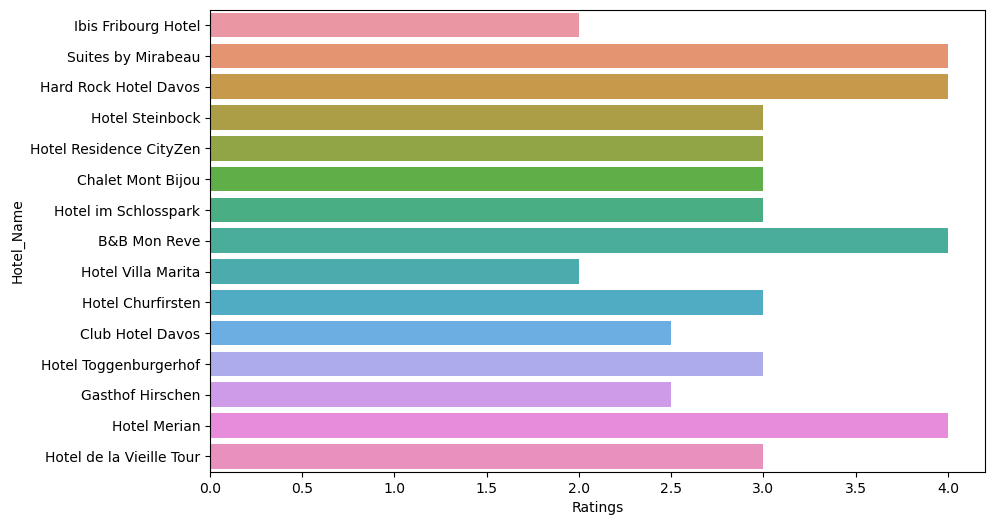

In [41]:
if len(h_df) >0 and type(h_df)==pd.core.frame.DataFrame:
    plt.figure(figsize=(10,6))
    sns.barplot(x=h_df['ratings'],y=h_df['hotelname'])
    plt.xlabel('Ratings')
    plt.ylabel('Hotel_Name')
    plt.show()
else:
    print('No hotel found')

In [42]:
'''                                                 Thank You                                       '''

'                                                 Thank You                                       '